# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [2]:
# fetch dataset 
raw_df = pd.read_csv('dataset/Framingham Dataset.csv')

In [3]:
raw_df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.00,39,106.00,70.00,0,0.00,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.00,52,121.00,66.00,0,0.00,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.00,46,121.00,81.00,0,0.00,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.00,52,105.00,69.50,0,0.00,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.00,58,108.00,66.00,0,0.00,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212,1,173.00,46,126.00,82.00,0,0.00,19.17,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11623,9998212,1,153.00,52,143.00,89.00,0,0.00,25.74,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11624,9999312,2,196.00,39,133.00,86.00,1,30.00,20.91,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201
11625,9999312,2,240.00,46,138.00,79.00,1,20.00,26.39,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201


# EDA

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [5]:
# Initialize empty lists for categorical, numerical, and binary features
categorical = []
numerical = []

# Iterate through columns and append to appropriate list
for column in raw_df.columns:
    if raw_df[column].dtype == 'object':
        categorical.append(column)
    elif raw_df[column].dtype in ['float64', 'int64']:
        numerical.append(column)
        
print('Categorical:', categorical)
print('Numerical:', numerical)


Categorical: []
Numerical: ['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP']


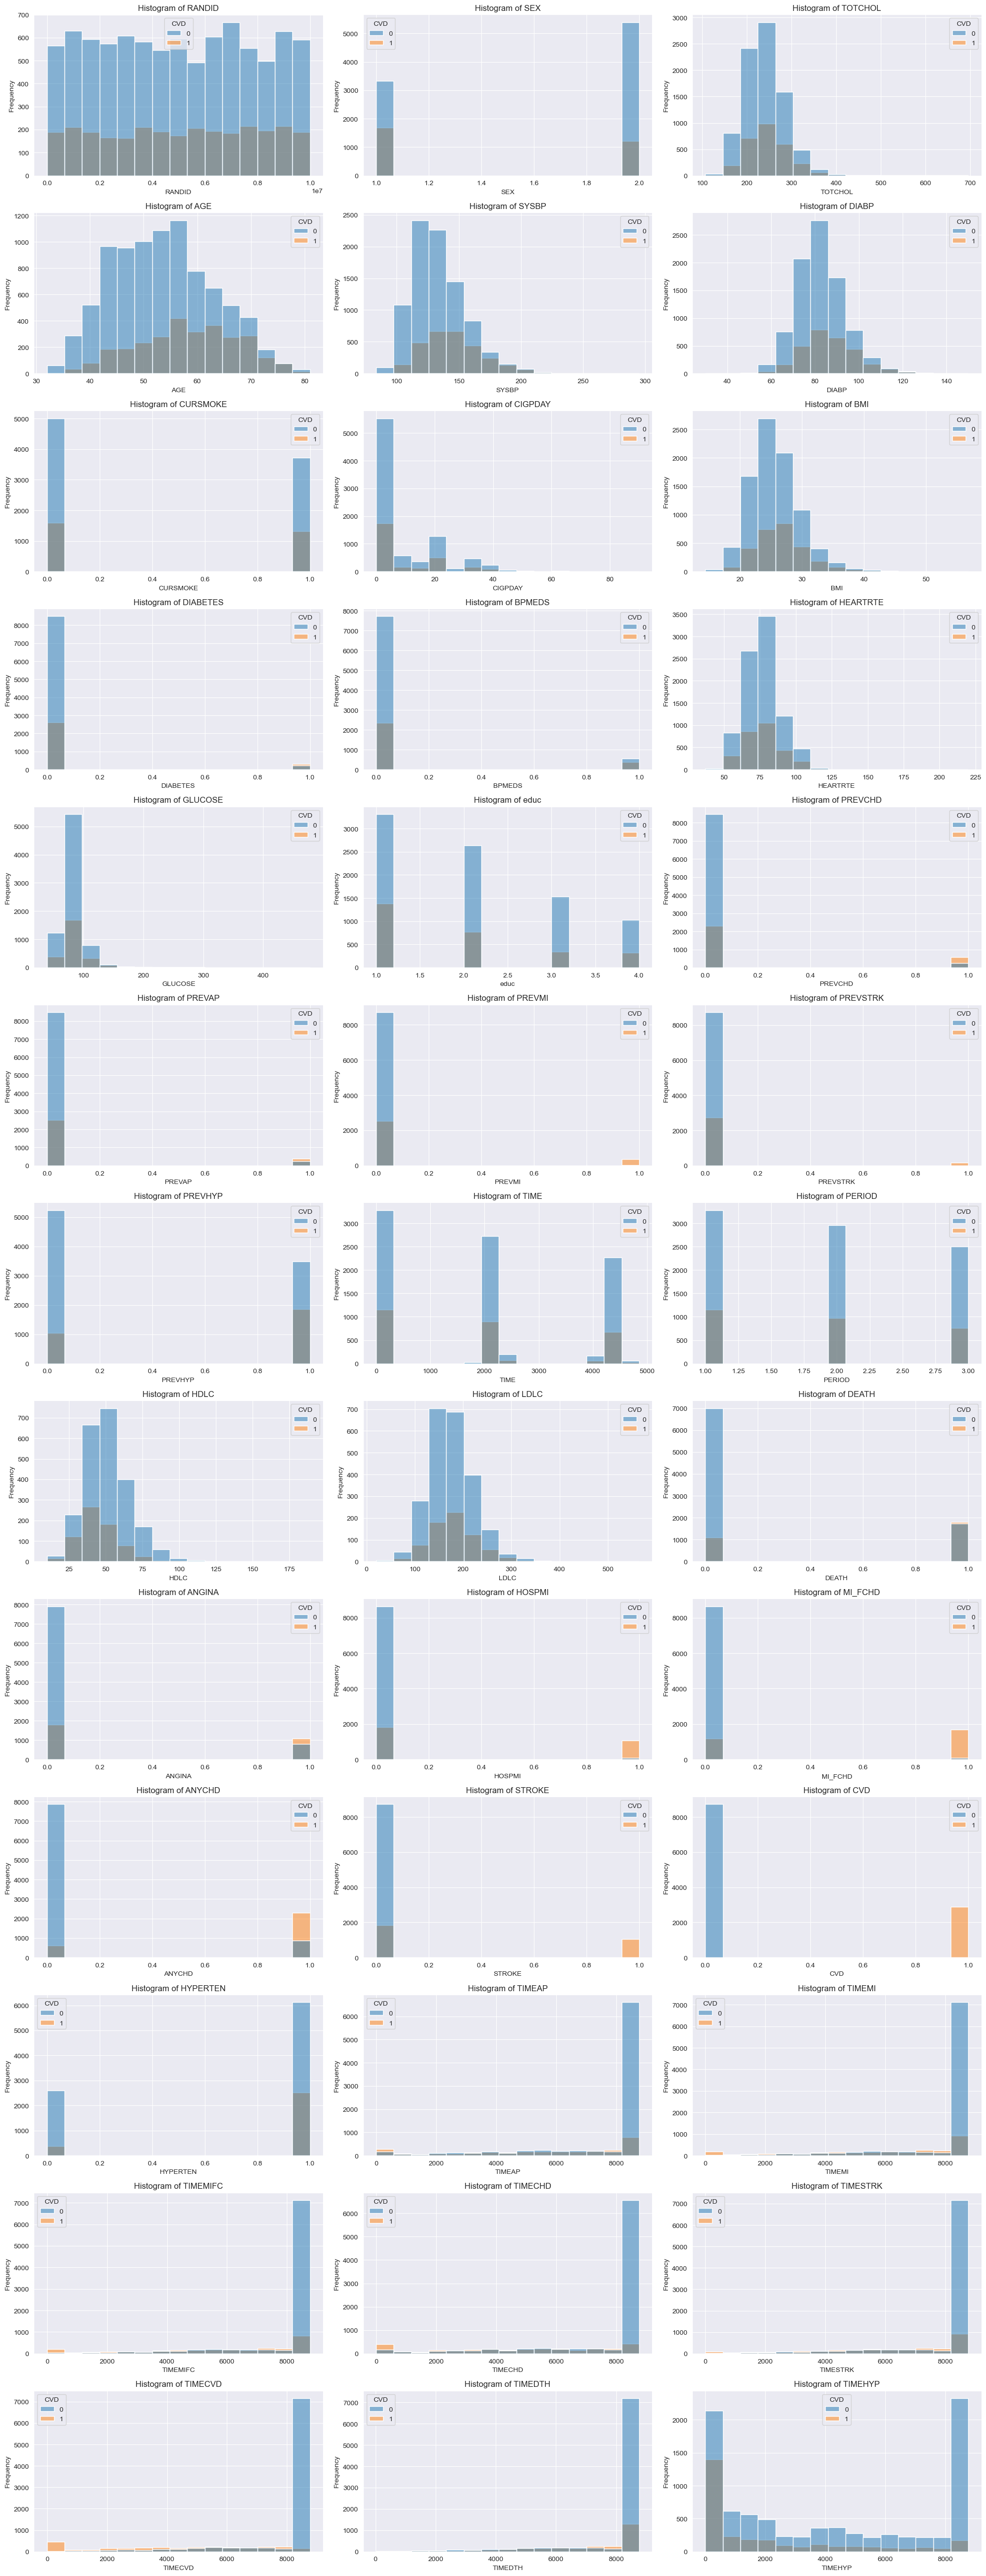

<Figure size 2000x0 with 0 Axes>

In [6]:
# Calculate number of rows and columns for the grid
num_cols = 3  # Number of columns in the grid
num_rows_numerical = (len(numerical) + num_cols - 1) // num_cols  # Calculate number of rows needed for numerical features
num_rows_categorical = (len(categorical) + num_cols - 1) // num_cols  # Calculate number of rows needed for categorical features

# Plot numerical features in a grid
plt.figure(figsize=(20, 4 * num_rows_numerical))  # Adjust height based on number of rows

for i, feature in enumerate(numerical):
    plt.subplot(num_rows_numerical, num_cols, i + 1)
    sns.histplot(data=raw_df, x=feature, bins=15, hue='CVD')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Plot categorical features in a grid
plt.figure(figsize=(20, 4 * num_rows_categorical))  # Adjust height based on number of rows

for i, feature in enumerate(categorical):
    plt.subplot(num_rows_categorical, num_cols, i + 1)
    sns.countplot(y=feature, data=raw_df, hue='CVD')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [7]:
# Get value counts for all columns
value_counts = {column: raw_df[column].value_counts() for column in raw_df.columns}

# Print value counts for all columns
for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print()

Value counts for column 'RANDID':
RANDID
9999312    3
8454887    3
4987008    3
8464932    3
8460794    3
          ..
5865112    1
5833584    1
2951629    1
2954907    1
3717739    1
Name: count, Length: 4434, dtype: int64

Value counts for column 'SEX':
SEX
2    6605
1    5022
Name: count, dtype: int64

Value counts for column 'TOTCHOL':
TOTCHOL
240.00    186
250.00    154
232.00    150
226.00    149
220.00    145
         ... 
379.00      1
406.00      1
460.00      1
122.00      1
119.00      1
Name: count, Length: 299, dtype: int64

Value counts for column 'AGE':
AGE
52    470
54    464
51    448
53    433
50    426
48    426
58    404
55    399
56    396
57    386
60    382
46    380
59    367
49    367
63    357
61    348
47    342
62    341
45    339
64    321
44    304
65    290
67    266
42    258
43    256
66    237
68    216
41    213
40    212
69    192
39    178
70    169
38    145
71    142
72    110
73    107
37     93
74     90
36     84
75     71
76     51
35     42
7

# Preprocessing
## Handling Missing Values

In [8]:
# counter percentage missing value in dataset (Function)
def missing_value(data_frame):
    total = data_frame.isnull().sum().sort_values(ascending=False)
    percentage = (data_frame.isnull().sum() / data_frame.isnull().count() * 100).sort_values(ascending=False)
    dtypes = data_frame.dtypes
    return pd.concat([total, percentage, dtypes], axis=1, keys=['Total', 'Percentage', 'Dtypes'])

In [9]:
missing_value(raw_df)

,Total,Percentage,Dtypes
LDLC,8601,73.97,float64
HDLC,8600,73.97,float64
GLUCOSE,1440,12.38,float64
BPMEDS,593,5.10,float64
TOTCHOL,409,3.52,float64
educ,295,2.54,float64
CIGPDAY,79,0.68,float64
BMI,52,0.45,float64
HEARTRTE,6,0.05,float64
TIMEAP,0,0.00,int64


In [10]:
def impute_median(data):
    return data.fillna(data.median())

raw_df['TOTCHOL'] = raw_df['TOTCHOL'].transform(impute_median)
raw_df['CIGPDAY'] = raw_df['CIGPDAY'].transform(impute_median)
raw_df['BMI'] = raw_df['BMI'].transform(impute_median)
raw_df['BPMEDS'] = raw_df['BPMEDS'].transform(impute_median)
raw_df['HEARTRTE'] = raw_df['HEARTRTE'].transform(impute_median)
raw_df['GLUCOSE'] = raw_df['GLUCOSE'].transform(impute_median)
raw_df['educ'] = raw_df['educ'].transform(impute_median)

In [11]:
missing_value(raw_df)

,Total,Percentage,Dtypes
LDLC,8601,73.97,float64
HDLC,8600,73.97,float64
CVD,0,0.00,int64
DEATH,0,0.00,int64
ANGINA,0,0.00,int64
HOSPMI,0,0.00,int64
MI_FCHD,0,0.00,int64
ANYCHD,0,0.00,int64
STROKE,0,0.00,int64
RANDID,0,0.00,int64


## Outliers

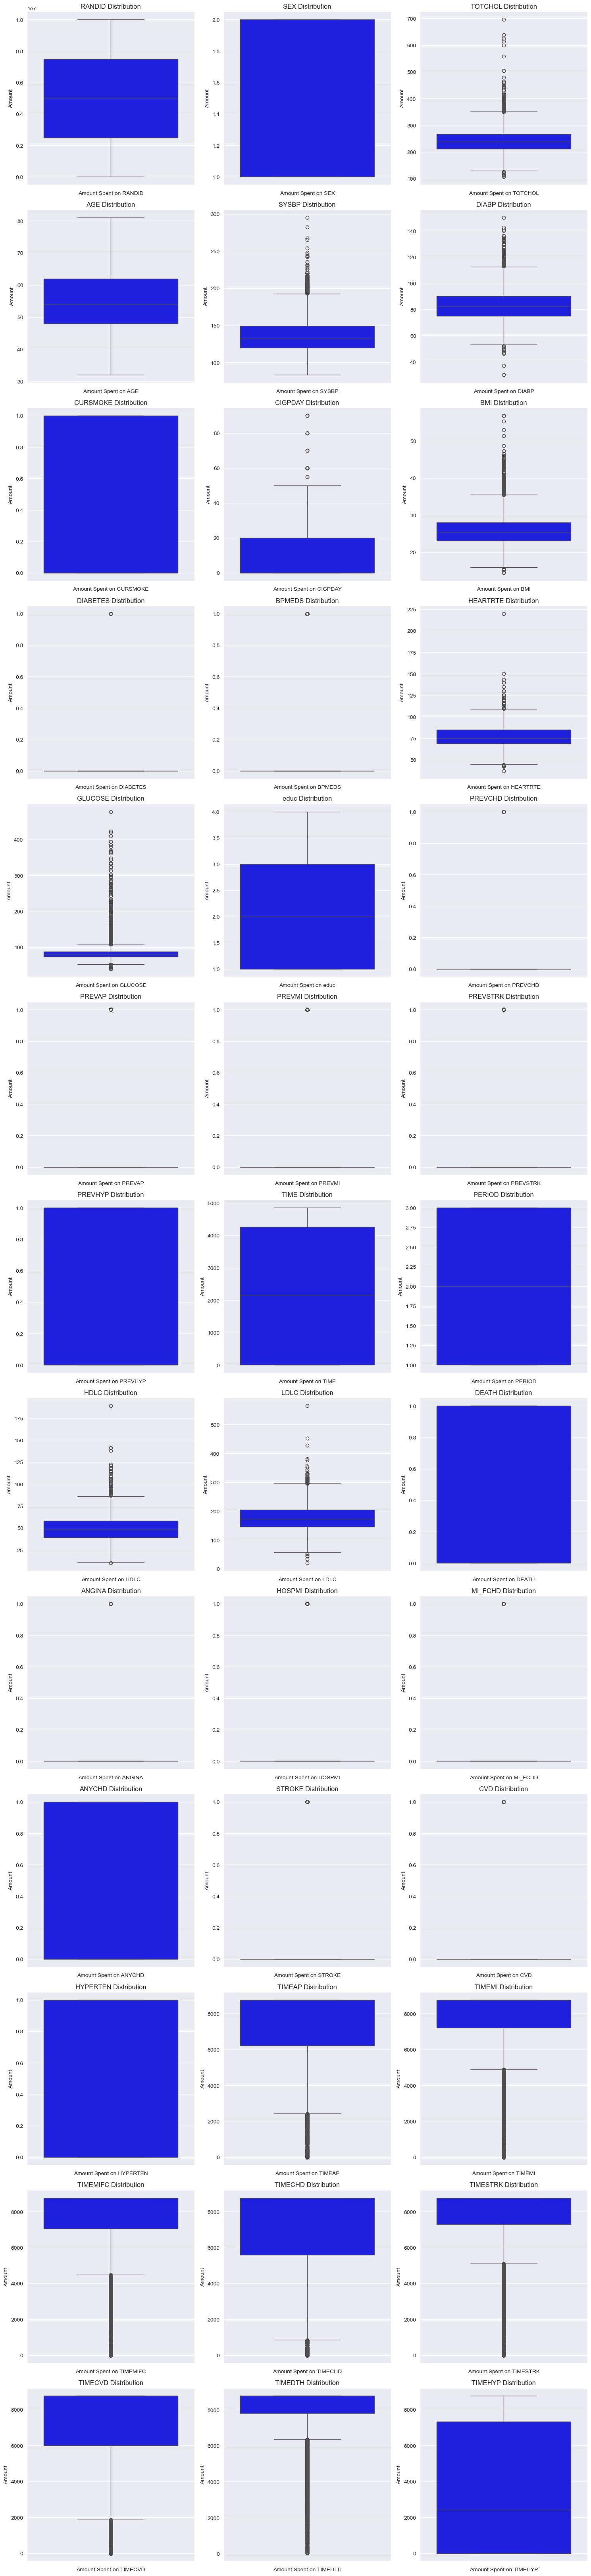

In [12]:
# Assuming `raw_df` is your dataframe and `numerical` is a list of numerical column names
fig, axes = plt.subplots(nrows=num_rows_numerical, ncols=num_cols, figsize=(15, 5 * num_rows_numerical))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Create box plots for each selected feature
for i, feature in enumerate(numerical):
    sns.boxplot(raw_df[feature], color='blue', ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(f'Amount Spent on {feature}')
    axes[i].set_ylabel('Amount')

# Remove any extra subplots if there are fewer features than subplots
for j in range(i + 1, num_rows_numerical * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
raw_df = raw_df[raw_df['CIGPDAY'] <= 40]
raw_df = raw_df[(raw_df['DIABP'] > 40) & (raw_df['DIABP'] < 140)]
raw_df = raw_df[(raw_df['BMI'] <= 50) & (raw_df['BMI'] >= 20)]
raw_df = raw_df[raw_df['HEARTRTE'] <= 200]
raw_df = raw_df[raw_df['GLUCOSE'] < 450]
raw_df = raw_df[raw_df['TOTCHOL'] < 500]

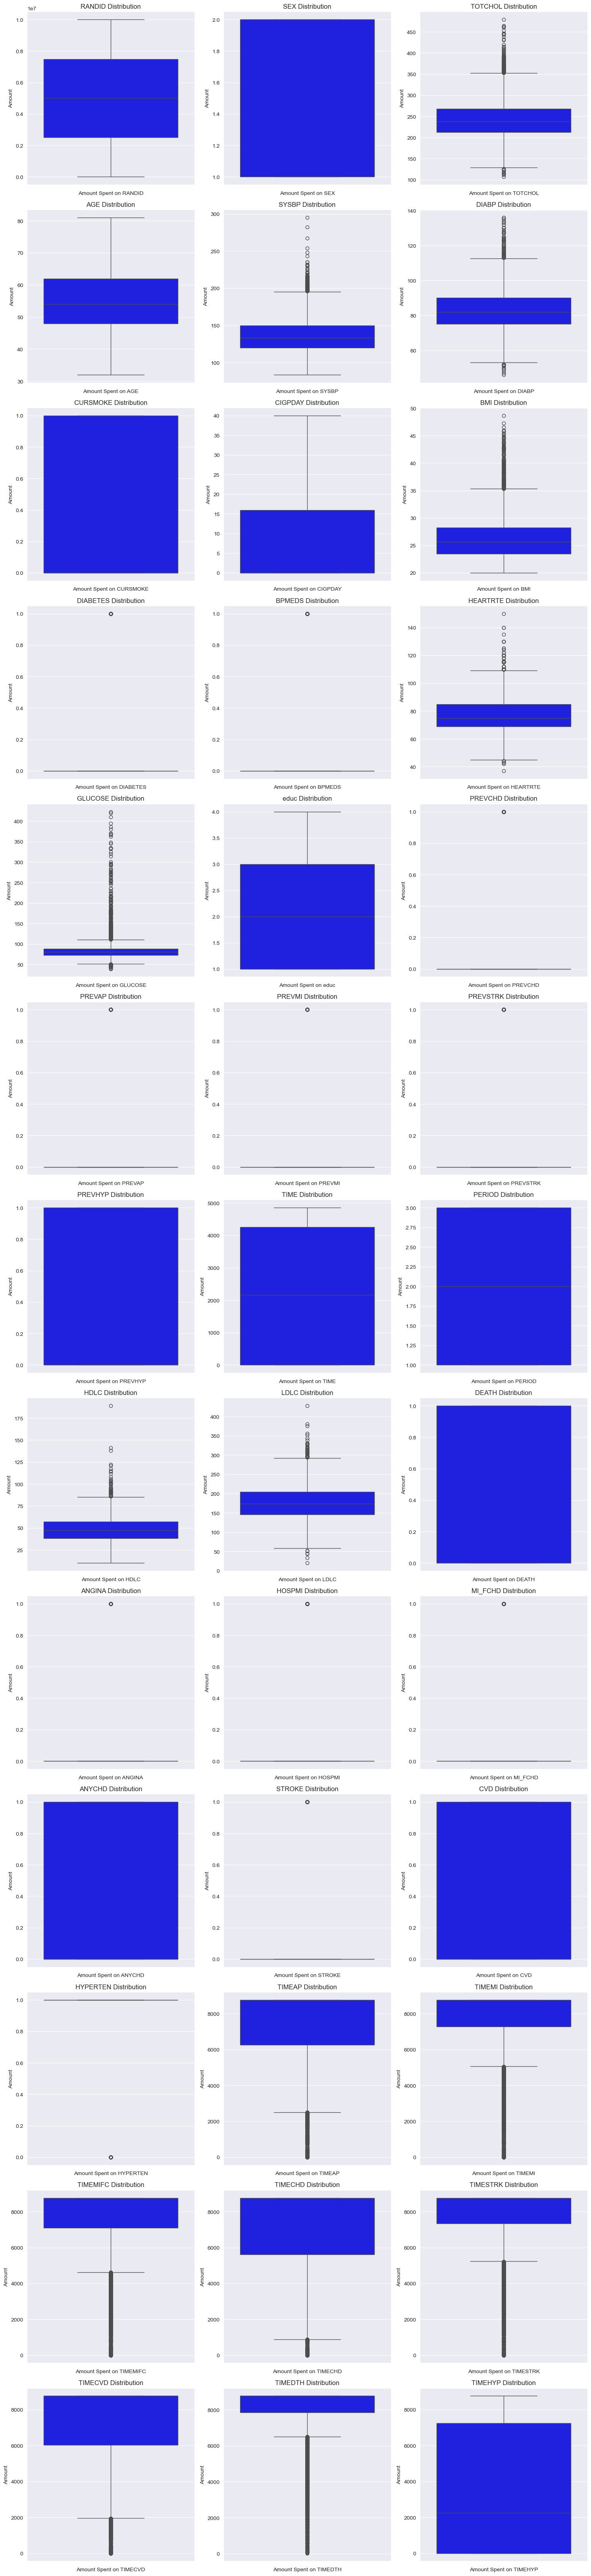

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `raw_df` is your dataframe and `numerical` is a list of numerical column names
fig, axes = plt.subplots(nrows=num_rows_numerical, ncols=num_cols, figsize=(15, 5 * num_rows_numerical))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Create box plots for each selected feature
for i, feature in enumerate(numerical):
    sns.boxplot(raw_df[feature], color='blue', ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(f'Amount Spent on {feature}')
    axes[i].set_ylabel('Amount')

# Remove any extra subplots if there are fewer features than subplots
for j in range(i + 1, num_rows_numerical * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## Drop Absurd data

In [15]:
raw_df.drop(columns=['LDLC', 'HDLC'], inplace=True)

In [16]:
filtered_df = raw_df[(raw_df['CVD'] == 0) & ((raw_df['MI_FCHD'] == 1) |(raw_df['HOSPMI'] == 1)| (raw_df['ANYCHD'] == 1) | (raw_df['STROKE'] == 1) | (raw_df['ANGINA'] == 1))]

indices_to_drop = filtered_df.index
raw_df.drop(indices_to_drop, inplace=True)

In [17]:
raw_df.drop(columns=['TIMEHYP', 'TIMEDTH', 'TIMESTRK', 'TIMECHD', 'TIMEMI', 'TIME', 'TIMEAP','TIMECVD', 'TIMEMIFC'], inplace=True)

In [18]:
raw_df.drop(columns=['STROKE', 'HYPERTEN', 'ANYCHD', 'HOSPMI', 'MI_FCHD'], inplace=True)

# Features Correlations

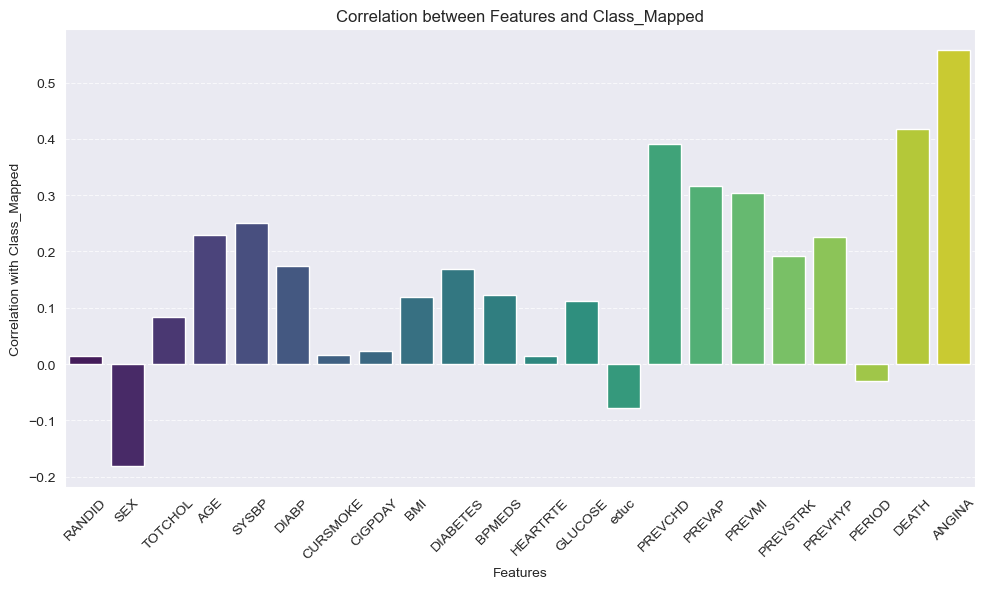

In [19]:
# Calculate correlations with 'Class_Mapped'
correlations = raw_df.corr()['CVD'].drop('CVD')

# Plotting the correlations with explicit hue assignment
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, hue=correlations.index, dodge=False, palette='viridis', legend=False)

plt.xlabel('Features')
plt.ylabel('Correlation with Class_Mapped')
plt.title('Correlation between Features and Class_Mapped')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [20]:
raw_df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,PERIOD,DEATH,ANGINA,CVD
0,2448,1,195.00,39,106.00,70.00,0,0.00,26.97,0,...,4.00,0,0,0,0,0,1,0,0,1
1,2448,1,209.00,52,121.00,66.00,0,0.00,25.48,0,...,4.00,0,0,0,0,0,3,0,0,1
2,6238,2,250.00,46,121.00,81.00,0,0.00,28.73,0,...,2.00,0,0,0,0,0,1,0,0,0
3,6238,2,260.00,52,105.00,69.50,0,0.00,29.43,0,...,2.00,0,0,0,0,0,2,0,0,0
4,6238,2,237.00,58,108.00,66.00,0,0.00,28.50,0,...,2.00,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,9998212,1,185.00,40,141.00,98.00,0,0.00,25.60,0,...,3.00,0,0,0,0,1,1,0,0,0
11623,9998212,1,153.00,52,143.00,89.00,0,0.00,25.74,0,...,3.00,0,0,0,0,1,3,0,0,0
11624,9999312,2,196.00,39,133.00,86.00,1,30.00,20.91,0,...,3.00,0,0,0,0,0,1,0,0,0
11625,9999312,2,240.00,46,138.00,79.00,1,20.00,26.39,0,...,3.00,0,0,0,0,0,2,0,0,0


# Split

In [21]:
X = raw_df.drop(columns=['CVD'])  
y = raw_df['CVD'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize

In [22]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
lazy=LazyClassifier(verbose=1, ignore_warnings=False, predictions=True)
models,predict=lazy.fit(X_train,X_test,y_train,y_test)
print(models)

  3%|▎         | 1/31 [00:00<00:07,  4.16it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8551655956500247, 'Balanced Accuracy': 0.7785382902387727, 'ROC AUC': 0.7785382902387727, 'F1 Score': 0.8482881141321914, 'Time taken': 0.24051403999328613}


 13%|█▎        | 4/31 [00:00<00:04,  5.97it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.8581314878892734, 'Balanced Accuracy': 0.778278485710751, 'ROC AUC': 0.7782784857107509, 'F1 Score': 0.8505106940638415, 'Time taken': 0.31290602684020996}
{'Model': 'BernoulliNB', 'Accuracy': 0.8433020266930301, 'Balanced Accuracy': 0.7784306569343066, 'ROC AUC': 0.7784306569343066, 'F1 Score': 0.8391433328269965, 'Time taken': 0.08783483505249023}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8630746416213544, 'Balanced Accuracy': 0.7770809105530125, 'ROC AUC': 0.7770809105530124, 'F1 Score': 0.8540350462870294, 'Time taken': 0.10825800895690918}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8136431043005438, 'Balanced Accuracy': 0.7684133366324384, 'ROC AUC': 0.7684133366324385, 'F1 Score': 0.8144249290247032, 'Time taken': 0.05319571495056152}
{'Model': 'DummyClassifier', 'Accuracy': 0.7291151754819575, 'Balanced Accuracy': 0.5, 'ROC A

 29%|██▉       | 9/31 [00:01<00:02,  8.49it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8606030647553139, 'Balanced Accuracy': 0.7771062724236051, 'ROC AUC': 0.7771062724236051, 'F1 Score': 0.8521422993125721, 'Time taken': 0.4046630859375}
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'
{'Model': 'GaussianNB', 'Accuracy': 0.8556599110232328, 'Balanced Accuracy': 0.734150068044043, 'ROC AUC': 0.734150068044043, 'F1 Score': 0.8361526860429268, 'Time taken': 0.007814884185791016}


 39%|███▊      | 12/31 [00:06<00:12,  1.49it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8457736035590707, 'Balanced Accuracy': 0.7743913151057775, 'ROC AUC': 0.7743913151057775, 'F1 Score': 0.8401917767975123, 'Time taken': 4.808848142623901}


 42%|████▏     | 13/31 [00:06<00:12,  1.47it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.8200692041522492, 'Balanced Accuracy': 0.7728201162934554, 'ROC AUC': 0.7728201162934554, 'F1 Score': 0.8201720406813271, 'Time taken': 0.7429091930389404}


 45%|████▌     | 14/31 [00:07<00:12,  1.33it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.8210578348986654, 'Balanced Accuracy': 0.7740715081034268, 'ROC AUC': 0.774071508103427, 'F1 Score': 0.8211601063918692, 'Time taken': 1.071239948272705}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.861097380128522, 'Balanced Accuracy': 0.7545082271433874, 'ROC AUC': 0.7545082271433874, 'F1 Score': 0.8465978268282525, 'Time taken': 0.01702404022216797}
{'Model': 'LinearSVC', 'Accuracy': 0.8650519031141869, 'Balanced Accuracy': 0.768115180007423, 'ROC AUC': 0.768115180007423, 'F1 Score': 0.8533193825646802, 'Time taken': 0.02873969078063965}
{'Model': 'LogisticRegression', 'Accuracy': 0.8645575877409788, 'Balanced Accuracy': 0.782685265371768, 'ROC AUC': 0.7826852653717679, 'F1 Score': 0.8564653623788683, 'Time taken': 0.015149116516113281}
{'Model': 'NearestCentroid', 'Accuracy': 0.8274839347503707, 'Balanced Accuracy': 0.7658629221823581, 'ROC AUC': 0.7658629221823581, 'F1 Score': 0.8245053599177966, 'Time taken': 0.006544113159179687

 61%|██████▏   | 19/31 [00:09<00:06,  1.94it/s]

{'Model': 'NuSVC', 'Accuracy': 0.8581314878892734, 'Balanced Accuracy': 0.7513274774217493, 'ROC AUC': 0.7513274774217493, 'F1 Score': 0.8434944573017752, 'Time taken': 1.5709280967712402}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.8264953040039545, 'Balanced Accuracy': 0.7588772732896202, 'ROC AUC': 0.7588772732896203, 'F1 Score': 0.8222735871960599, 'Time taken': 0.013773679733276367}
{'Model': 'Perceptron', 'Accuracy': 0.7563025210084033, 'Balanced Accuracy': 0.7204899171099839, 'ROC AUC': 0.7204899171099841, 'F1 Score': 0.7622641625295318, 'Time taken': 0.008640766143798828}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.2708848245180425, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.115476377935346, 'Time taken': 0.06399202346801758}


 74%|███████▍  | 23/31 [00:10<00:03,  2.57it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8665348492338112, 'Balanced Accuracy': 0.7828943461586044, 'ROC AUC': 0.7828943461586045, 'F1 Score': 0.8580495493569325, 'Time taken': 0.6877260208129883}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8601087493821058, 'Balanced Accuracy': 0.7515365582085859, 'ROC AUC': 0.7515365582085859, 'F1 Score': 0.844990567316306, 'Time taken': 0.008472919464111328}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8601087493821058, 'Balanced Accuracy': 0.7515365582085859, 'ROC AUC': 0.7515365582085859, 'F1 Score': 0.844990567316306, 'Time taken': 0.02663898468017578}
{'Model': 'SGDClassifier', 'Accuracy': 0.8546712802768166, 'Balanced Accuracy': 0.7455140418161574, 'ROC AUC': 0.7455140418161573, 'F1 Score': 0.8392344236524029, 'Time taken': 0.029736042022705078}


 87%|████████▋ | 27/31 [00:11<00:01,  2.85it/s]

{'Model': 'SVC', 'Accuracy': 0.8586258032624815, 'Balanced Accuracy': 0.7568272918470864, 'ROC AUC': 0.7568272918470865, 'F1 Score': 0.8454562790535801, 'Time taken': 1.05716872215271}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'
{'Model': 'XGBClassifier', 'Accuracy': 0.8640632723677706, 'Balanced Accuracy': 0.793814796486453, 'ROC AUC': 0.793814796486453, 'F1 Score': 0.8584200910464203, 'Time taken': 0.08597993850708008}
[LightGBM] [Info] Number of positive: 2203, number of negative: 5889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1427
[LightGBM] [Info] Numbe

100%|██████████| 31/31 [00:12<00:00,  2.52it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8630746416213544, 'Balanced Accuracy': 0.783962019052332, 'ROC AUC': 0.7839620190523321, 'F1 Score': 0.8555944819088681, 'Time taken': 0.8307540416717529}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.86               0.79     0.79      0.86   
LGBMClassifier                     0.86               0.78     0.78      0.86   
RandomForestClassifier             0.87               0.78     0.78      0.86   
LogisticRegression                 0.86               0.78     0.78      0.86   
AdaBoostClassifier                 0.86               0.78     0.78      0.85   
BernoulliNB                        0.84               0.78     0.78      0.84   
BaggingClassifier                  0.86               0.78     0.78      0.85   
ExtraTreesClassifier               0.86               0.78     0.78      0